# Python ODE Solvers

In `scipy`, there are several built-in functions for solving initial value problems. The most common one used is the `scipy.integrate.solve_ivp` function.

## Example

Consider the ODE
$$
\frac{dS(t)}{dt} = \cos t
$$
for an initial value $S_0 = 0$. The exact solution to this problem is $S(t) = \sin(t)$. Use `solve_ivp` to approximate the solution to this initial value problem over the interval $[0, \pi]$. Plot the approximate solution versus the exact solution and the relative error over time.

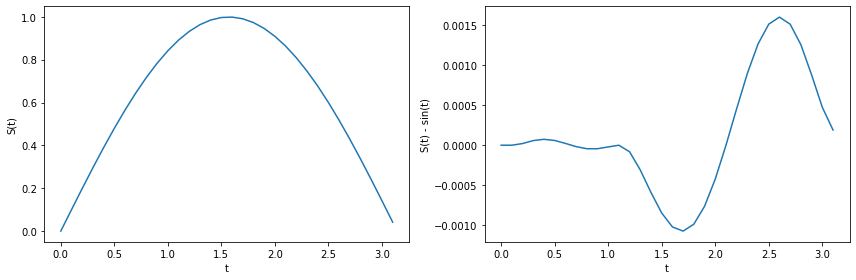

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The above left figure shows the integration of $\frac{dS(t)}{dt} = \cos(t)$ with `solve_ivp`. The right figure computes the difference between the solution of the integration by `solve_ivp` and the evalution of the analytical solution to this ODE.

Using the `rtol` and `atol` to make the difference between the approximate and exact solution is less than $1e-7$.

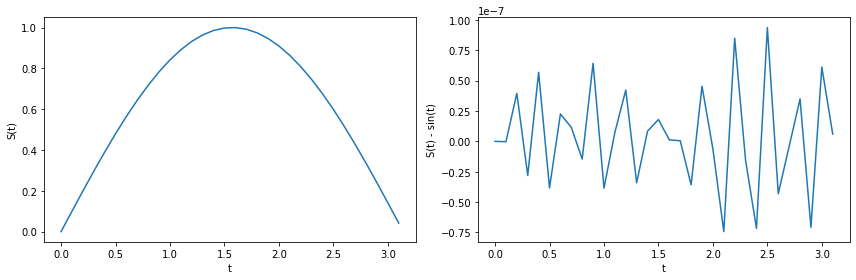

In [2]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

## Example

Consider the ODE
$$
\frac{dS(t)}{dt} = -S(t),
$$
with an initial value of $S_0 = 1$. The exact solution to this problem is $S(t) = e^{−t}$. Use `solve_ivp` to approximate the solution to this initial value problem over the interval $[0,1]$. Plot the approximate solution versus the exact solution, and the relative error over time.

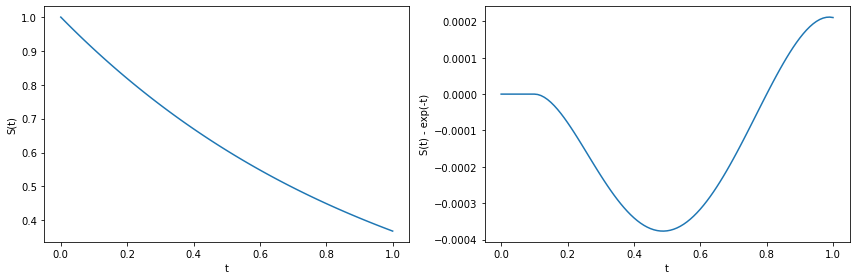

In [3]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

## Example

Let the state of a system be defined by $S(t) = \begin{bmatrix} x(t) \\ y(t) \end{bmatrix}$, and let the evolution of the system be defined by the ODE
$$
\frac{dS(T)}{dt}
=
\begin{bmatrix}
    0 & t^2\\
    -t & 0
\end{bmatrix}
S(t).
$$
Use `solve_ivp` to solve this ODE for the time interval $[0,10]$ with an initial value of $S_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$. Plot the solution in $(x(t),y(t))$.

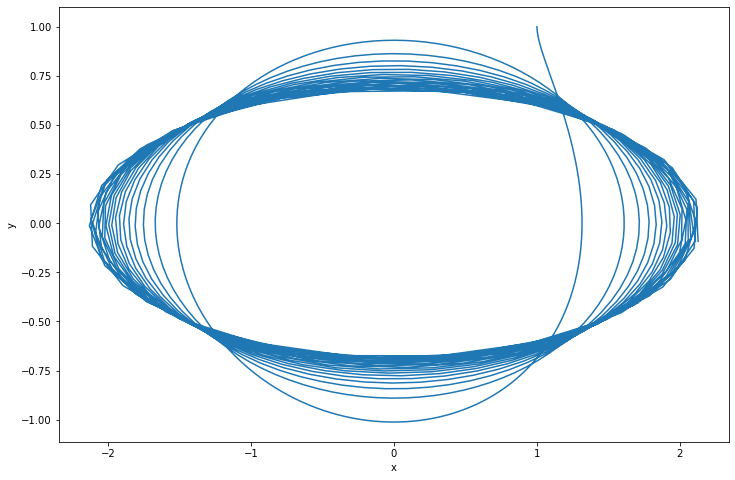

In [4]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()